<a href="https://colab.research.google.com/github/rohitme9798/Google-play-store-app-review-analysis/blob/main/Play_store_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
##Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
##Explore and analyze the data to discover key factors responsible for app engagement and success

###Before deep-diving straight into the problem solution, we need to create a roadmap which we will be referring to throughout this exploratory data analysis.
###Google Play Store is a digital store managed and developed by Google, which provides services like installing applications for android and Chrome-based OS users.
###After installing applications some users give reviews and rating for the app they have used, this ratings and reviews defines the satisfaction of the customers, that's directly proportional to the performance of the app. So it is essential to analyze these ratings and reviews to improve the quality of service which will cater to the need of end-users.
###The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. It is of 10k Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.
###Discussion of Google play store dataset will involve various steps such as
###1. loading the data into the data frame
###2. cleaning the data
###3. extracting statistics from the dataset
###4. exploratory analysis and visualizations
###5. questions that can be asked from the dataset
###6. conclusion

In [1]:
# importing the data file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(16,7)})


In [2]:
#Mount drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Step 1. Loading the Database

In [3]:
# Create the directional path for data 
dir_path="/content/drive/My Drive/Almabetter/Play Store Data.csv"

In [4]:
# Read data
df=pd.read_csv(dir_path)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Check data from bottom
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#Checking the shape of play store data set.
print(f"The shape of google play data store is {df.shape}, where number of rows and columns are {df.shape[0]} ,{df.shape[1]} respectively")

The shape of google play data store is (10841, 13), where number of rows and columns are 10841 ,13 respectively


In [ ]:
# Dropping the features that we are not using extensively
df=df.drop(['Current Ver',"Android Ver"],axis=1)

In [ ]:
# To Know the null values in each row of column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

### As we can explicitly see that there are 1474 missing values in rating columns. We have to fill these values with proper calculation. . But the question is how to handle the rating columns because we can not assign those as median, mean, or mode as in real life ratings are given by the customers, We are now using forward linear interpolation to fill nan values inside the rating column.

In [ ]:
#Handling Missing values using interpolate forward linear method
df.interpolate(method='linear',limit_direction='forward',inplace=True)

In [ ]:
# Recheck for Null Values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
dtype: int64

###As we can see there is one missing value in the content rating feature and one missing value inside type features, now we will be filling those two values with appropriate values.

In [ ]:
# Filling NAN values with suitable values
df['Content Rating'].fillna(value='everyone',inplace=True)
df['Type'].fillna(value='free',inplace=True)

In [ ]:
# Final Check for NULL values
df.isnull().sum().any()

False

In [ ]:
# Look at the Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


###Step 2 - Cleaning Start

###After looking at the information about all data features in given data set, there is demand to work around data and make it useable flawlessly, Let's get down to business guys!




In [14]:
# Converting the datatype into porper data structure ,through ratings are already float64,just confirming.
df['Rating']=df['Rating'].astype(str).astype(float)

In [15]:
# As we can see in play store info need to typecast this to the proper intiger
df['Reviews']=df['Reviews'].apply(lambda x:x.replace("3.0M","3000000"))
df['Reviews']=df['Reviews'].apply(lambda x:int(x))

In [16]:
# Converting Number of Installs into proper intiger
df=df[df['Installs']!='Free']
df['Installs']=df['Installs'].apply(lambda x:x.replace("+","") if "+" in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x:x.replace(".","") if "," in str(x) else x)
df['Installs']=df['Installs'].apply (lambda x: int())

In [17]:
# price never be an object it should be float
df['Price']=df['Price'].apply(lambda x:x.replace ("$","") if "$" in str(x) else x)
df['Price']=df['Price'].apply(lambda x: float(x))

In [18]:
# Now fix the  Size Column
df['Size']=df['Size'].apply(lambda x: str(x).replace("varies with device","NaN") if "varies with device" in str(x) else x)
df['Size']=df['Size'].apply(lambda x :str(x).replace("M","") if "M" in str(x) else x)
df['Size']=df['Size'].apply(lambda x: float(str(x).replace("k",""))/1000 if "k" in str(x) else x)
df['Size']=df['Size'].apply(lambda x: float())

In [19]:
# Fixing last updated object to date time
df['Last Updated'].unique()
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [20]:
# Ubique catagory
len(df['Category'].unique())

33

###Step 3. Extracting statistics from the dataset

###Here we will be doing some statistical analysis of data using pandas built-in method called describe(). Describe only works for the numerical features

In [21]:
# Let's take some statistical taste of play store dataframe:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,10840.0,10840.0,10840.000000
mean,4.191757,4.441529e+05,0.0,0.0,1.027368
std,0.515219,2.927761e+06,0.0,0.0,15.949703
min,1.000000,0.000000e+00,0.0,0.0,0.000000
25%,4.000000,3.800000e+01,0.0,0.0,0.000000
50%,4.300000,2.094000e+03,0.0,0.0,0.000000
75%,4.500000,5.477550e+04,0.0,0.0,0.000000
max,5.000000,7.815831e+07,0.0,0.0,400.000000


In [22]:
# installing the pandas profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     | 34.6 MB 868 kB/s
     |████████████████████████████████| 10.1 MB 65 kB/s 
     |████████████████████████████████| 636 kB 61.5 MB/s 
     |████████████████████████████████| 102 kB 77.8 MB/s 
     |████████████████████████████████| 675 kB 45.9 MB/s 
     |████████████████████████████████| 3.1 MB 67.3 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 812 kB 76.1 MB/s 
     |████████████████████████████████| 28.5 MB 53 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=25a49459f39fcdd1a520b17be4496948ce1f70b75c3cffb61257df92c994e849
  Stored in directory: /tmp/pip-ephem-wheel-cache-ddme52ww/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=c34122337906294924f07612914644aa7a0019c4c182a0aeb097d2c6f10ccb68
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d2

In [23]:
# Importing profile report from pandas profiling
from pandas_profiling import profile_report

In [24]:
# collecting the pandas prifiling report
df.profile_report()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###Step 4: Exploratory Data Analysis
###In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

###Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns.

###Reference(https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [25]:
# Importing Liberary plotely
import plotly.express as px

In [26]:
# Distributing of average app rating as per their catagory
average_rating=df.groupby('Category')['Rating'].median().reset_index()

In [ ]:
# Plotting a bar plot using plotely for average rating per catagory
px.bar(data_frame=average_rating,x=average_rating['Category'],y=average_rating['Rating'],text='Rating',title='average rate per Category')

In [ ]:
# printing the overall mean of the rating for all the categories in play store
print(f"The average rating for each catagory is around {round(np.mean(df['Rating']),1)} out of 5")

The average rating for each catagory is around 4.2 out of 5


###As we can see from above bar plot, almost every category has average rating around 4.2, 4.5 is the highest rating for three categories namely Books_and_reference ,Events, and Health_and_Fitness.

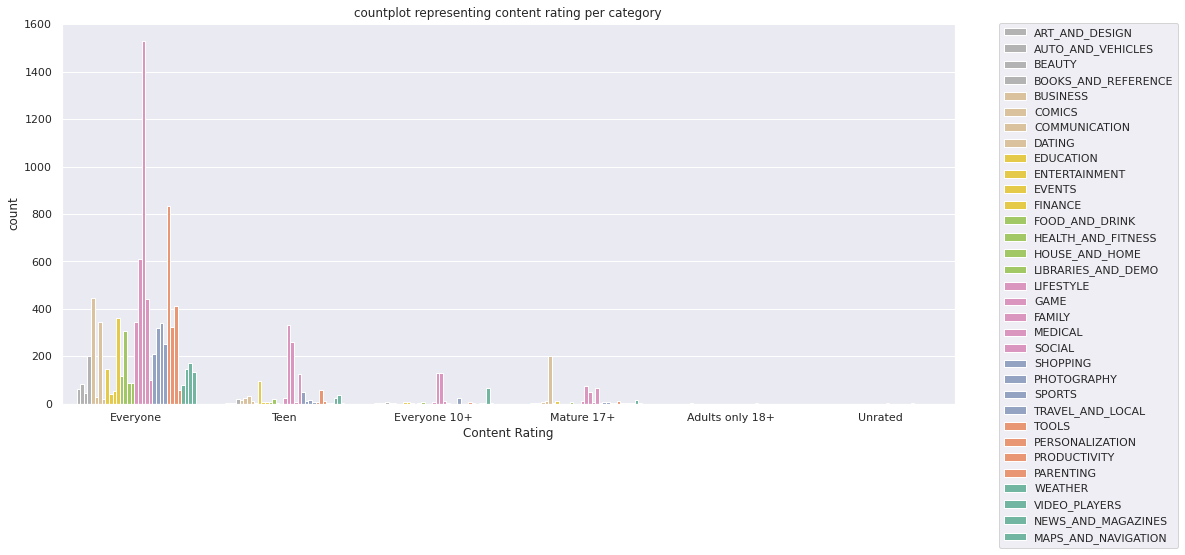

In [ ]:
# countplot the content rating
sns.countplot(x="Content Rating",data=df,hue="Category",palette='Set2_r')
plt.title("countplot representing content rating per category")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

###A count plot is a kind of like a histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.

###Content rating is another feature available in the given google play store data set.
###Content rating describes the minimum maturity of content inside the applications. But doesn’t tells that application is designed for a specific age group. We used the count plot to understand the content rating for each category.
###Most of the applications on google play is having a content rating for everyone. However, only the dating category is for the mature 17+ age group.

In [ ]:
# Groupby category and summing the price
price_per_category=df.groupby('Category', as_index=True)['Price'].sum().reset_index()

In [ ]:
# Apply lemda function for proper formatting upto 1 float point decimal of price value
price_per_category['Price']=price_per_category['Price'].apply(lambda x: "{0:1.1f}$".format(x))

In [ ]:
#Ploting bar plot using plotely
px.bar(data_frame=price_per_category,x='Category',y='Price',text='Price',title='Price per Category in dollars')

In [ ]:
print(categories)

                  index  Category
0                FAMILY      1972
1                  GAME      1144
2                 TOOLS       843
3               MEDICAL       463
4              BUSINESS       460
5          PRODUCTIVITY       424
6       PERSONALIZATION       392
7         COMMUNICATION       387
8                SPORTS       384
9             LIFESTYLE       382
10              FINANCE       366
11   HEALTH_AND_FITNESS       341
12          PHOTOGRAPHY       335
13               SOCIAL       295
14   NEWS_AND_MAGAZINES       283
15             SHOPPING       260
16     TRAVEL_AND_LOCAL       258
17               DATING       234
18  BOOKS_AND_REFERENCE       231
19        VIDEO_PLAYERS       175
20            EDUCATION       156
21        ENTERTAINMENT       149
22  MAPS_AND_NAVIGATION       137
23       FOOD_AND_DRINK       127
24       HOUSE_AND_HOME        88
25    AUTO_AND_VEHICLES        85
26   LIBRARIES_AND_DEMO        85
27              WEATHER        82
28       ART_A

###One can clearly understand that applications from the category finance have high price than any others, family category applications are second high priced applications, at third we have lifestyle category applications and at last, we have medical category applications, these four categories application charges high price when compared with others.

In [6]:
# calculating number of categories available in ecah category and storing it in variable categories.
categories=df['Category'].value_counts().reset_index()

In [11]:
# Resetting the names of column here
categories.set_axis(['Category','count'],axis=1,inplace=True)

In [28]:
# Plotting  a bar plot representing the total count of application in each category using plotely
px.bar(data_frame=categories,x=categories['Category'],y=categories['count'],text='count',title="Total number of Application per Category")

###The above count plot is the evidence that category family has the most number of applications available on the google play store, and very few apps are available for the category beauty and parenting. What I believe that beauty comes from inside and parenting should be come as naturally as possible.

In [30]:
# Caterories with the Most Reviews
most_reviewed_category=df.groupby('Category',as_index=False)['Reviews'].sum()

In [31]:
# Calculating total number of reviews in entire given play store data storing into total reviews variable
total_reviews=df['Reviews'].sum()

In [36]:
#Calculating percentage review and creating a new column for that
most_reviewed_category['percentage_review']=most_reviewed_category['Reviews']*100/total_reviews

In [38]:
# Apply Lambda Function for proper formatting on newly created percentage review column
most_reviewed_category['percentage_review']=most_reviewed_category['percentage_review'].apply(lambda x: "{0:1.2f}%".format(x))

In [44]:
# Ploting a bar plot using plotely to find out which category has most reviews and least reviews
most_reviewed=px.bar(data_frame=most_reviewed_category,x=most_reviewed_category.Category,y=most_reviewed_category.Reviews,title='Most Reviewed category in percentage review',text="percentage_review")
most_reviewed

###As we can check gaming category have highest percentage reviews, The second highly reviewed category is communication. For events category there are almost no reviews, second least reviewed category beauty

In [ ]:
# Category with the most space required ,we are talking about the size of application available in each category
most_spaced_required_category=dg.groupby('Category' as_index=False)['size'].sum().sort_values(by='size',ascending=False)

In [ ]:
# Total size in entire given google play store data set
total_size=df['size'].sum()

In [ ]:
# Calculating the percentage size and creating a new column inside most spaced required category data frame
most_spaced_required_category['percentage_space_required']=most_spaced_required_category['size']*100/total_size

In [ ]:
# Applying lambda function for proper formatting on newly created percentage space required column.
most_spaced_required_category['percentage_space_required']=most_spaced_required_category['percentage_space_required'].apply(lambda x:"(0:1.2f)%".format(x))

In [ ]:
# Ploting a bar plot using plotely to know which categories of application takes most space inside the google play store 
px.bar(data_frame =most_spaced_required_category,x=most_spaced_required_category.Category,y=most_spaced_required_category['size'],title='Most space required category',text='percentage_space_required')